In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

from jne_functions import *
from ipywidgets import interactive, FloatSlider
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [2]:
df=pd.read_csv('bank_marketing_modified.csv')
df

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,age_group,season,pdays_bin
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-aged,spring,0
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-aged,spring,0
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult,spring,0
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-aged,spring,0
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Middle-aged,spring,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,41183,73,retired,married,professional.course,no,yes,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,Senior,fall,0
41172,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,Middle-aged,fall,0
41173,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,Middle-aged,fall,0
41174,41186,44,technician,married,professional.course,no,no,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,Middle-aged,fall,0


In [3]:
X=df.loc[:,['campaign','previous','emp.var.rate','poutcome','euribor3m','nr.employed',
            'cons.price.idx','cons.conf.idx','job','marital','education',
            'housing','loan','day_of_week','pdays_bin','age_group','default','month']]
y=df['deposit']

In [4]:
param_grid={'classifier__n_estimators':[1000,2000,5000],
           'classifier__max_depth':[3,5,7],
           'classifier__use_label_encoder':[False],
           'classifier__learning_rate':[0.1,0.05,0.15],
           'classifier__subsample':[0.5,0.8,1],
           'classifier__min_child_weight':[3,5,7],
           'classifier__colsample_bytree':[.5,.8,1],
           'classifier__objective':['binary:logistic'],
           'classifier__scale_pos_weight':[10]}
classifiers_no_stan(xgb.XGBClassifier(),param_grid,X,y)

[21:42:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:35] WARNING: /home/conda/feedstock_r

[21:45:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:50] WARNING: /home/conda/feedstock_r

[21:49:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:49:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:50:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:50:16] WARNING: /home/conda/feedstock_r

[21:53:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:27] WARNING: /home/conda/feedstock_r

[21:55:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:36] WARNING: /home/conda/feedstock_r

{'classifier__use_label_encoder': False,
 'classifier__subsample': 1,
 'classifier__scale_pos_weight': 10,
 'classifier__objective': 'binary:logistic',
 'classifier__n_estimators': 2000,
 'classifier__min_child_weight': 5,
 'classifier__max_depth': 3,
 'classifier__learning_rate': 0.05,
 'classifier__colsample_bytree': 1}

In [5]:
from jne_functions import rand_s, X_train, X_test, y_train, y_test
confusion_matrix(y_test, rand_s.predict(X_test))

array([[5495, 1813],
       [ 376,  552]])

In [6]:
interactive(lambda threshold: make_confusion_matrix(rand_s, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

Text(0.5, 1.0, 'Precision and Recall Curves')

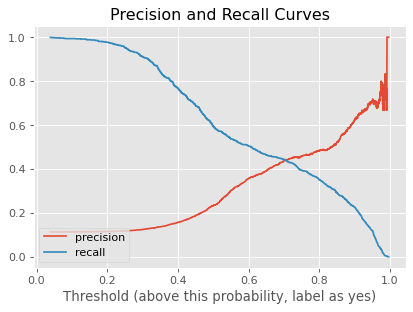

In [7]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rand_s.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as yes)');
plt.title('Precision and Recall Curves')

In [8]:
y_predict = rand_s.predict(X_test)
f1_score(y_test, y_predict,average='macro')

0.584579512718508

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      7308
           1       0.23      0.59      0.34       928

    accuracy                           0.73      8236
   macro avg       0.58      0.67      0.58      8236
weighted avg       0.86      0.73      0.78      8236



In [10]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rand_s.predict_proba(X_test)[:,1])

ROC AUC score =  0.7254329366258989


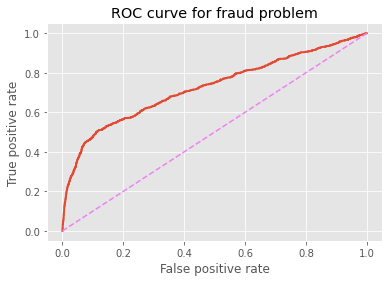

In [11]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, rand_s.predict_proba(X_test)[:,1]))